<a href="https://colab.research.google.com/github/wesmith4/mat210/blob/main/hw2/buffon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Buffon's Needle 

Assignment 2 <br>
Math 210 -- Chartier

Program: buffon.ipynb <br>
Author:  Will Smith

Buffon's Needle Experiment
with L = D = 1

Description: This program simulates Buffon's Needle experiment in the clase where L = D = 1. 


In [ ]:
import numpy as np
import math 

# L = 1  # length of the needle
# D = 1  # distance between the lines
n = 5000
settings = [(1,1),(0.5,2),(1,20)]

for (L,D) in settings:
  print('=============================')
  print('Buffon''s Needle Experiment')
  print('=============================\n')
  print((L,D))
  print('Total drops   Estimate for Pi')
  print('=============================')

  crossings = 0
  for i in range(n):
    randomNumber = np.random.rand()
    verticalPosition = D*randomNumber
    anotherRandomNumber = np.random.rand()
    theta = math.pi*anotherRandomNumber
    if (verticalPosition <= L*np.sin(theta)):
      crossings += 1
    if (np.mod(i,np.floor(n/10))==0) and (crossings > 0): 
        # print('%8d   %10.5f' % (i, 2*i/crossings))
        print('%8d   %10.5f' % (i,(2*i*L)/(D*crossings))) # Line for general approximation

  if crossings > 0: 
      # print('\nFinal Estimate after %d drops: %7.5f' % (n, 2*n/crossings))
      print('\nFinal Estimate after %d drops: %7.5f' % (n,(2*n*L)/(D*crossings))) # Line for general approximation
  else: 
      print('\n>>>> Ouch, we got no crossings which means no estimate due to a divide by zero!\n')
  print('Length of Needle       = %f' % L)
  print('Distance between Lines = %d\n' % D)


## Code for Problem 4
Let’s focus on his experiment with 530 tosses that resulted in an estimate of 3.1423 for π. Edit the code from the first problem of this homework to come to a conclusion as to how likely Fox was to have tossed the wire to attain his result. Take L = 3 and D = 4 as reported in Asaph Hall’s accounting of Fox’s work. Said another way, write a Monte Carlo simulation that tosses a needle 530 times. How likely is it that such an experiment will create an estimate of 3.1423 or better for π? If you do not attain a converged probability, carefully explain your results and conclusion.

Success rate:  0.035


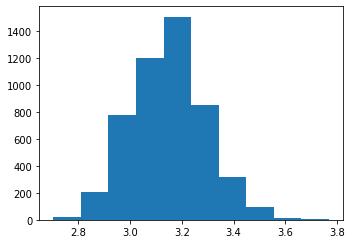

Mean:  3.1492765696913914
Standard deviation:  0.1421830712195823


In [23]:
from matplotlib import pyplot as plt
L = 3
D = 4
num_sims = 5000
num_tosses = 530
successes = 0
estimates = np.zeros(num_sims)


for sim in range(num_sims):
  crossings = 0
  for i in range(num_tosses):
    randomNumber = np.random.rand()
    verticalPosition = D*randomNumber
    anotherRandomNumber = np.random.rand()
    theta = math.pi*anotherRandomNumber
    if (verticalPosition <= L*np.sin(theta)):
      crossings += 1

  estimates[sim] = (2*num_tosses*L)/(D*crossings)
  if abs((2*num_tosses*L)/(D*crossings) - math.pi) <= abs(3.1423 - math.pi):
    successes += 1

print('Success rate: ', successes/num_sims)
fig, ax = plt.subplots(figsize =(5, 3.5), tight_layout = True)
ax.hist(estimates)
plt.show()
print('Mean: ', np.mean(estimates))
print('Standard deviation: ', np.std(estimates))